## Lollipop Problem

- basic

If there's time...
- time delay
- instability (randomness function)

Our goal here is to control the bicycle's tilt acceleration (and bring it as close as possible to a critically damped pendulum) by modulating the flywheel's acceleration (phi double dot).

## Bicycle tilt over time
We first want to create a table of theta and theta dot values over a time series.

In [104]:
import numpy as np

g = 9.8

# bicycle frame
m = 15 # in kg
l = 1 # in m

# flywheel
m_flywheel = 0.5 # (mass of the flywheel)
r = 0.15 # radius of the flywheel (m)
I = (1/2) * m_flywheel*(r**2)

gamma = 0 # for now.

def tilt():
    """Calculates the bicycle's tilt angle and tilt velocity (theta and theta dot)"""
    return [theta, theta_dot]

def flywheel(theta):
    """Calculates the necessary flywheel acceleration for a given tilt angle theta (radians)"""
    phi_double_dot = ((m*l**2)/I)*(g/l + gamma)*theta
    return phi_double_dot

We can now calculate the flywheel acceleration required for a given bicycle tilt angle.

In [105]:
degrees = 20
theta = np.radians(degrees)
print(f'flywheel acceleration for theta = {degrees} degrees\n =', flywheel(theta))

flywheel acceleration for theta = 20 degrees
 = 9122.25422375703


What does theta for a (a falling rod) look like? We are only interested in up to 180 degrees (~3 radians).

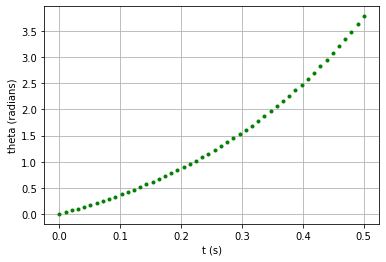

In [106]:
t = np.linspace(0, .5, num=50)

# now lets use the falling rod theta function
tau = 1/np.sqrt(g/l) # characteristic time

def theta(time):
    return np.exp(time/tau) - 1

import matplotlib.pyplot as plt

plt.plot(t, theta(t), 'g.', label='theta (t)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('theta (radians)')
plt.show()

Now that we have our theta values, we can plot the required flywheel acceleration.

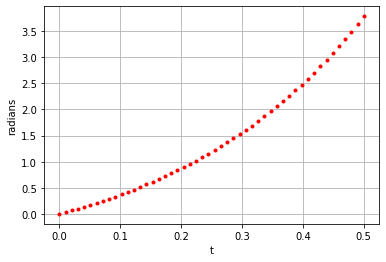

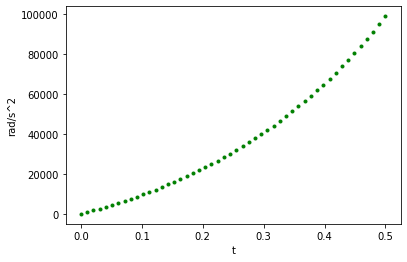

In [109]:
phi_double_dot = flywheel(theta(t))

plt.plot(t, theta(t), 'r.', label='theta (t)')
plt.grid()
plt.xlabel('t')
plt.ylabel('radians')
plt.show()

plt.plot(t, phi_double_dot, 'g.', label='phi double dot (t)')
plt.xlabel('t')
plt.ylabel('rad/s^2')
plt.show()

We notice almost immediately that the initial tilt acceleration grows exponentially. Furthermore, we see very substnatial tilt accelerations (> 20,000 rad/s^2) after 0.1 second. This shows that our flywheel will only work for very small angles of theta. Lets now change the time series to only 0.1 second.

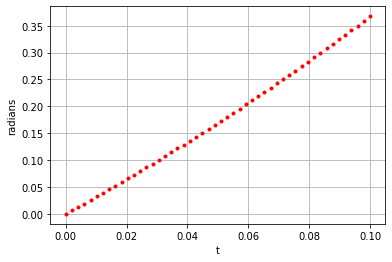

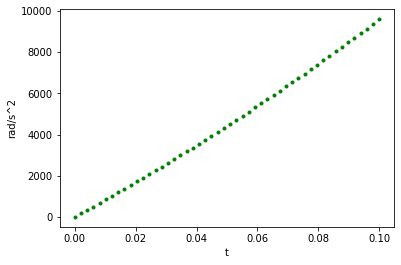

In [110]:
t = np.linspace(0, 0.1, num=50)
phi_double_dot = flywheel(theta(t))

plt.plot(t, theta(t), 'r.', label='theta (t)')
plt.grid()
plt.xlabel('t')
plt.ylabel('radians')
plt.show()

plt.plot(t, phi_double_dot, 'g.', label='phi double dot (t)')
plt.xlabel('t')
plt.ylabel('rad/s^2')
plt.show()

We now see a linear relationship between flywheel acceleration and time, which caps around 10,000 rad/s^2 near t = 0.1 m. This suggests a much more viable flywheel.

Now that we have a value for the flywheel acceleration, we can see how the bicycle responds.

# Damping
The control function we want for the bicycle's tilt acceleration is actually closer to a damped pendulum, since we want it to swing back to theta = 0.

In [119]:
# damping coefficient
zeta = 1 # for critical damping

def flywheel(theta, theta_dot):
    """Calculates the necessary flywheel acceleration for a given tilt angle theta (radians) and theta_dot (radians/s)"""
    phi_double_dot = ((m*l**2)/I)*( ((g/l + gamma)*theta) + zeta*theta_dot)
    return phi_double_dot

We can now calculate the flywheel acceleration required for a given bicycle tilt angle and velocity.

In [122]:
degrees = 20
theta = np.radians(degrees)
theta_dot = np.radians(theta/.1) # v = d/t
print(f'flywheel acceleration for theta = {degrees} degrees, theta_dot = {theta_dot} rad/s\n =', flywheel(theta, theta_dot))

flywheel acceleration for theta = 20 degrees, theta_dot = 0.060923483957341706 rad/s
 = 9284.716847643274


This makes sense. We need a bit more acceleration now that the flywheel is moving with some velocity.

What does theta for a (a falling rod) look like? We are only interested in up to 180 degrees (~3 radians).

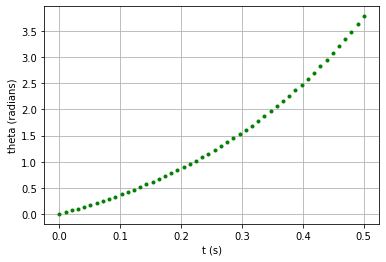

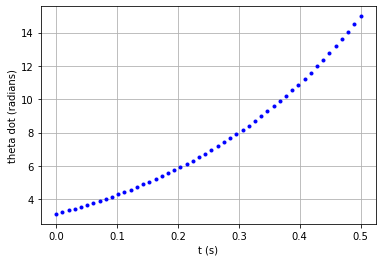

In [137]:
t = np.linspace(0, .5, num=50)

# now lets use the falling rod theta function
tau = 1/np.sqrt(g/l) # characteristic time

def theta(time):
    return np.exp(time/tau) - 1 # we add the 1 so we start at 0 radians

def theta_dot(time):
    """Simply the time derivative of our theta function"""
    return (1/tau) * np.exp(time/tau)


import matplotlib.pyplot as plt

plt.plot(t, theta(t), 'g.', label='theta (t)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('theta (radians)')
plt.show()

plt.plot(t, theta_dot(t), 'b.', label='theta dot (t)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('theta dot (radians)')
plt.show()

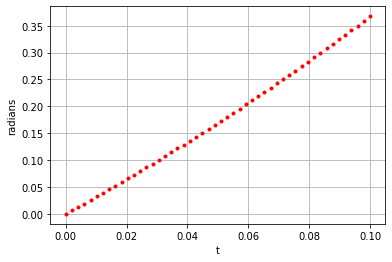

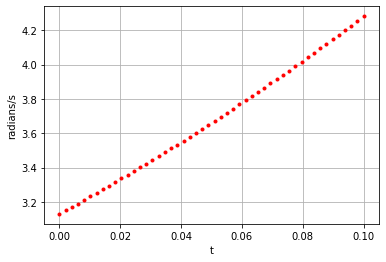

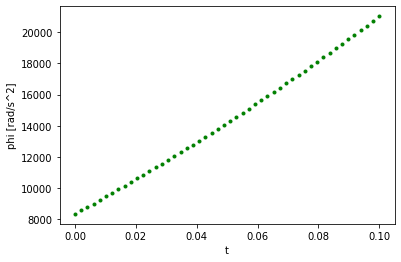

In [143]:
t = np.linspace(0, 0.1, num=50)
phi_double_dot = flywheel(theta(t), theta_dot(t))

plt.plot(t, theta(t), 'r.', label='theta (t)')
plt.grid()
plt.xlabel('t')
plt.ylabel('radians')
plt.show()

plt.plot(t, theta_dot(t), 'r.', label='theta_dot (t)')
plt.grid()
plt.xlabel('t')
plt.ylabel('radians/s')
plt.show()

plt.plot(t, phi_double_dot, 'g.', label='phi double dot (t)')
plt.xlabel('t')
plt.ylabel('phi [rad/s^2]')
plt.show()